In [9]:
%pylab inline
from TB.c import*
import os
from lrg_omics.proteomics.quality_control.maxquant import maxquant_qc, collect_maxquant_qc_data

Populating the interactive namespace from numpy and matplotlib
import pandas as pd
import numpy as np
import os, re

from os.path import isdir, isfile, basename, dirname

from glob import glob
from pathlib import Path as P
from tqdm.notebook import tqdm

import seaborn as sns



In [6]:
from lrg_omics.proteomics.tools import *

In [7]:
PATH = os.path.join('..','tests', 'data', 'maxquant', 'tmt11', 'txt')

In [8]:
load_maxquant_data_from(PATH)

Index       MS    MS/MS  MS3  MS/MS Submitted  MS/MS Identified  \
0      0  11446.0  20684.0  0.0          22656.0            7179.0   

   MS/MS Identified [%]  Peptide Sequences Identified  \
0                  32.0                        5873.0   

   Av. Absolute Mass Deviation [mDa]  Mass Standard Deviation [mDa]  ...  \
0                           150530.0                       159940.0  ...   

   N_missed_cleavages_total  N_missed_cleavages_eq_0 [%]  \
0                    1007.0                        82.85   

   N_missed_cleavages_eq_1 [%]  N_missed_cleavages_eq_2 [%]  \
0                        16.29                         0.85   

   N_missed_cleavages_gt_3 [%]  N_peptides_last_amino_acid_K [%]  \
0                          0.0                             66.51   

   N_peptides_last_amino_acid_R [%]  N_peptides_last_amino_acid_other [%]  \
0                             31.69                                   1.8   

   Mean_parent_intensity_fraction  Missed Cleavages [%]  
0                            0.76                 17.15  

[1 rows x 29 columns]

In [7]:
maxquant_qc(PATH)

MS  MS/MS MS3 MS/MS Submitted MS/MS Identified MS/MS Identified [%]  \
0  11446  20684   0           22656             7179                   32   

  Peptide Sequences Identified Av. Absolute Mass Deviation [mDa]  \
0                         5873                            150530   

  Mass Standard Deviation [mDa] N_protein_groups  ...  \
0                        159940             1272  ...   

  reporter_intensity_corrected_qc3_cv RT_for_ATEEQLK  \
0                        not detected   not detected   

  Ave_Intensity_for_ATEEQLK RT_for_AEFVEVTK Ave_Intensity_for_AEFVEVTK  \
0              not detected    not detected               not detected   

  RT_for_QTALVELL Ave_Intensity_for_QTALVELL RT_for_TVMENFVAFVDK  \
0    not detected               not detected        not detected   

  Ave_Intensity_for_TVMENFVAFVDK  \
0                   not detected   

                                              RUNDIR  
0  /mnt/c/Users/soere/workspace/lrg_omics/tests/d...  

[1 rows x 64 columns]

In [8]:
collect_maxquant_qc_data(PATH, force_update=True, from_csvs=False)

MS  MS/MS MS3 MS/MS Submitted MS/MS Identified MS/MS Identified [%]  \
0  11446  20684   0           22656             7179                   32   

  Peptide Sequences Identified Av. Absolute Mass Deviation [mDa]  \
0                         5873                            150530   

  Mass Standard Deviation [mDa] N_protein_groups  ...  \
0                        159940             1272  ...   

  reporter_intensity_corrected_qc3_cv RT_for_ATEEQLK  \
0                        not detected   not detected   

  Ave_Intensity_for_ATEEQLK RT_for_AEFVEVTK Ave_Intensity_for_AEFVEVTK  \
0              not detected    not detected               not detected   

  RT_for_QTALVELL Ave_Intensity_for_QTALVELL RT_for_TVMENFVAFVDK  \
0    not detected               not detected        not detected   

  Ave_Intensity_for_TVMENFVAFVDK  \
0                   not detected   

                                              RUNDIR  
0  /mnt/c/Users/soere/workspace/lrg_omics/tests/d...  

[1 rows x 64 columns]

In [9]:
from lrg_omics.proteomics.pipelines.maxquant import run_maxquant

# RawTools

In [10]:
from lrg_omics.proteomics.quality_control.rawtools import rawtools_cmds, rawtools_qc_cmd

PATH = '/data/proteomics_storage/'
raw = f'{PATH}/SA010-R1-blank-200425-R2.raw'


In [14]:
matrix = pd.read_csv(f'{PATH}/SA010-R1-blank-200425-R2.raw_Matrix.txt', sep='\t')
matrix

MS2ScanNumber  MS1ScanNumber  MS2RetTime(min)  MS1RetTime(min)  \
0             2609           2607        18.113687        18.105550   
1             2696           2694        18.716585        18.708431   
2             2697           2694        18.721008        18.708431   
3             2700           2698        18.732888        18.724377   
4             3056           3054        21.192547        21.184416   
..             ...            ...              ...              ...   
517          14351          14334        96.622621        96.585653   
518          14352          14334        96.624467        96.585653   
519          14353          14334        96.626305        96.585653   
520          14355          14347        96.630906        96.613089   
521          14753          14751        99.384010        99.375864   

     DutyCycle(s)  Ms2TriggerRate(/Ms1Scan)  ParentIonMass  MonoisotopicMass  \
0        0.415215                         1     517.737488        517.737488   
1        0.416242                         2     431.203674        431.203674   
2        0.416242                         2     425.200134        425.200134   
3        0.437595                         1     441.867035        441.867035   
4        0.414797                         1     569.749756        569.749756   
..            ...                       ...            ...               ...   
517      1.646179                         6     637.928284        637.727905   
518      1.646179                         6     783.458862        783.124878   
519      1.646179                         6     941.122009        940.787659   
520      0.995309                         1     797.158813        796.908325   
521      0.415714                         1     453.311493        453.311493   

     PrecursorCharge  MS1IsolationInterference  ...  127CppmMassError  \
0                  2                  0.000000  ...          0.000000   
1                  3                  0.023107  ...          0.000000   
2                  3                  0.035834  ...          0.000000   
3                  3                  0.000000  ...          0.000000   
4                  2                  0.000000  ...          0.000000   
..               ...                       ...  ...               ...   
517                5                  0.325012  ...          0.000000   
518                3                  0.488726  ...          0.000000   
519                3                  0.293970  ...          0.000000   
520                4                  0.210074  ...          1.083147   
521                2                  0.000000  ...          0.000000   

     128NppmMassError  128CppmMassError  129NppmMassError  129CppmMassError  \
0            0.000000          0.000000               0.0               0.0   
1            0.000000          0.000000               0.0               0.0   
2            0.000000          0.000000               0.0               0.0   
3            0.000000          0.000000               0.0               0.0   
4            0.000000          0.000000               0.0               0.0   
..                ...               ...               ...               ...   
517          0.739570          3.738970               0.0               0.0   
518          2.049561          1.357286               0.0               0.0   
519          0.000000          0.000000               0.0               0.0   
520          1.096841          0.000000               0.0               0.0   
521          0.000000          0.000000               0.0               0.0   

     130NppmMassError  130CppmMassError  131NppmMassError  131CppmMassError  \
0            0.000000          0.000000          0.000000               0.0   
1            0.000000          0.000000          0.000000               0.0   
2            0.000000          0.000000          0.000000               0.0   
3            0.000000          0.000000          

In [15]:
matrix.columns.to_list()

['MS2ScanNumber',
 'MS1ScanNumber',
 'MS2RetTime(min)',
 'MS1RetTime(min)',
 'DutyCycle(s)',
 'Ms2TriggerRate(/Ms1Scan)',
 'ParentIonMass',
 'MonoisotopicMass',
 'PrecursorCharge',
 'MS1IsolationInterference',
 'ParentPeakFound',
 'ParentPeakArea',
 'PeakFirstScan',
 'PeakMaxScan',
 'PeakLastScan',
 'BaseLinePeakWidth(s)',
 'PeakParentScanIntensity',
 'PeakMaxIntensity',
 'Ms2FillTime',
 'Ms1FillTime',
 'HCDEnergy',
 'Ms2MedianIntensity',
 'Ms1MedianIntensity',
 '126Intensity',
 '127NIntensity',
 '127CIntensity',
 '128NIntensity',
 '128CIntensity',
 '129NIntensity',
 '129CIntensity',
 '130NIntensity',
 '130CIntensity',
 '131NIntensity',
 '131CIntensity',
 '126Mass',
 '127NMass',
 '127CMass',
 '128NMass',
 '128CMass',
 '129NMass',
 '129CMass',
 '130NMass',
 '130CMass',
 '131NMass',
 '131CMass',
 '126Noise',
 '127NNoise',
 '127CNoise',
 '128NNoise',
 '128CNoise',
 '129NNoise',
 '129CNoise',
 '130NNoise',
 '130CNoise',
 '131NNoise',
 '131CNoise',
 '126Resolution',
 '127NResolution',
 '127

<ipython-input-19-18fa1da57473>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  matrix.hist(ax=gca())


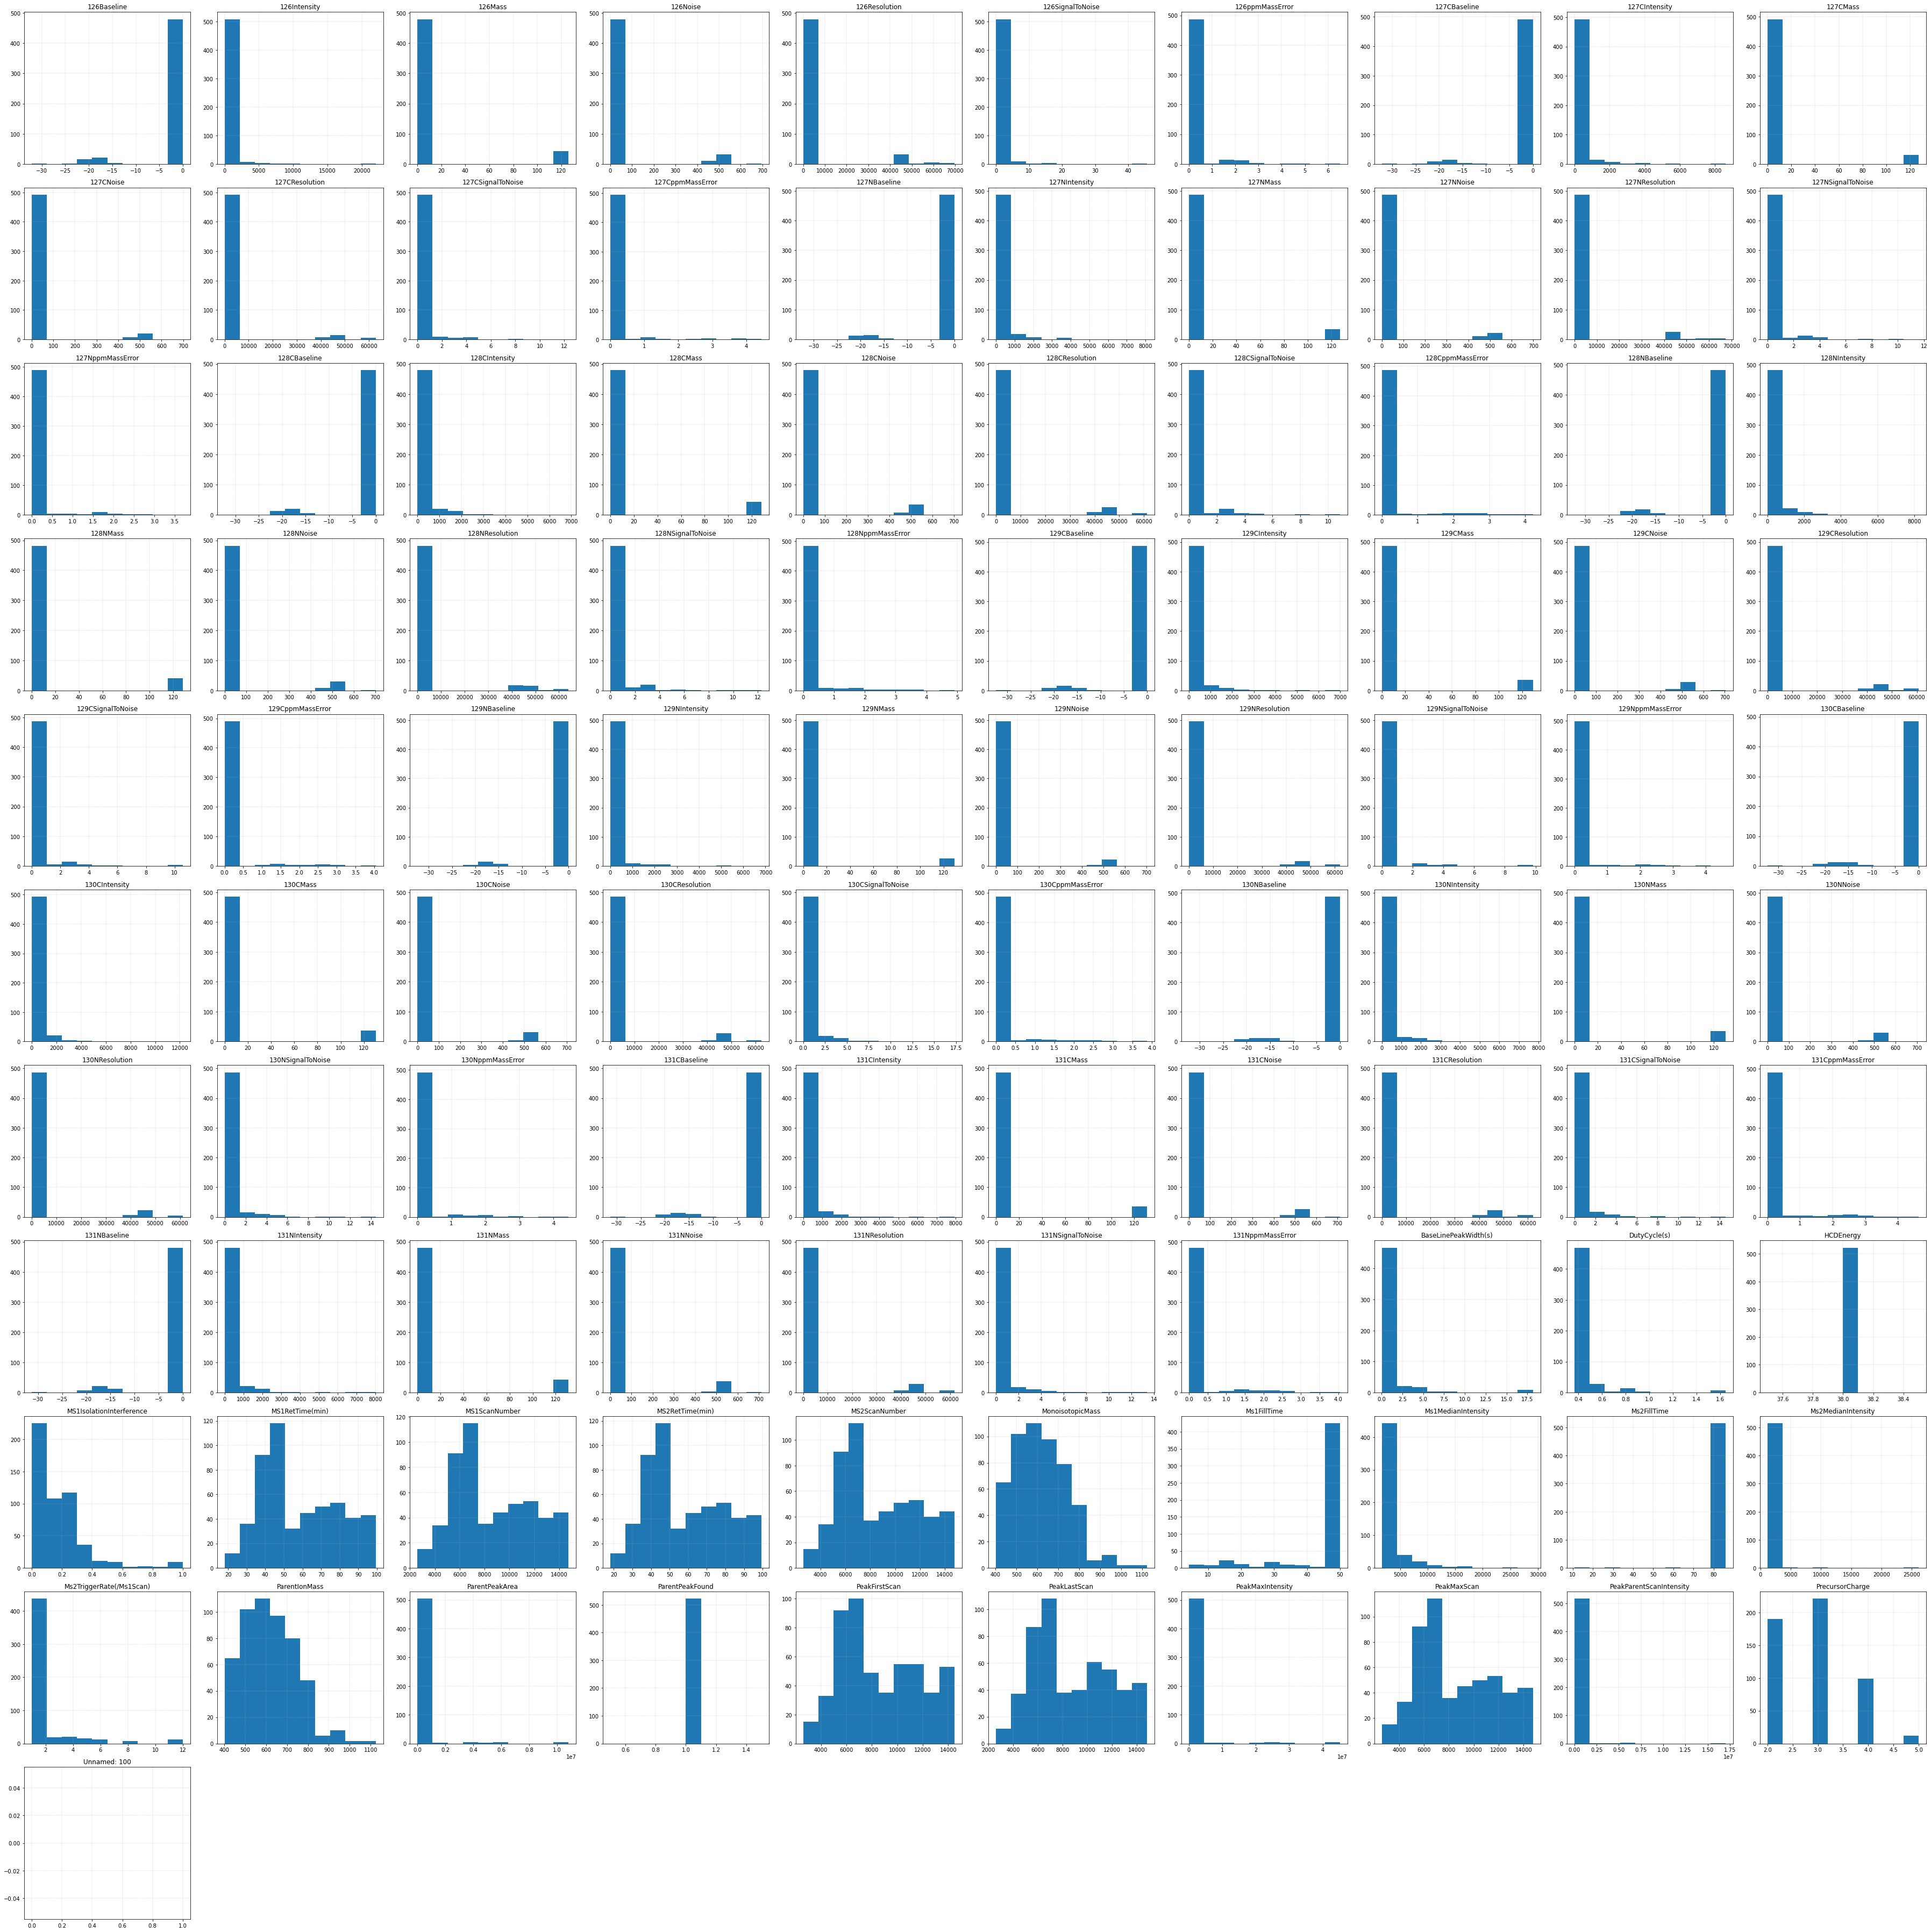

In [19]:
figure(figsize=(50,50))
matrix.hist(ax=gca())    
show()

In [55]:
df.columns.to_list()

['MS2ScanNumber',
 'MS1ScanNumber',
 'MS2RetTime(min)',
 'MS1RetTime(min)',
 'DutyCycle(s)',
 'Ms2TriggerRate(/Ms1Scan)',
 'ParentIonMass',
 'MonoisotopicMass',
 'PrecursorCharge',
 'MS1IsolationInterference',
 'ParentPeakFound',
 'ParentPeakArea',
 'PeakFirstScan',
 'PeakMaxScan',
 'PeakLastScan',
 'BaseLinePeakWidth(s)',
 'PeakParentScanIntensity',
 'PeakMaxIntensity',
 'Ms2FillTime',
 'Ms1FillTime',
 'HCDEnergy',
 'Ms2MedianIntensity',
 'Ms1MedianIntensity',
 '126Intensity',
 '127NIntensity',
 '127CIntensity',
 '128NIntensity',
 '128CIntensity',
 '129NIntensity',
 '129CIntensity',
 '130NIntensity',
 '130CIntensity',
 '131NIntensity',
 '131CIntensity',
 '126Mass',
 '127NMass',
 '127CMass',
 '128NMass',
 '128CMass',
 '129NMass',
 '129CMass',
 '130NMass',
 '130CMass',
 '131NMass',
 '131CMass',
 '126Noise',
 '127NNoise',
 '127CNoise',
 '128NNoise',
 '128CNoise',
 '129NNoise',
 '129CNoise',
 '130NNoise',
 '130CNoise',
 '131NNoise',
 '131CNoise',
 '126Resolution',
 '127NResolution',
 '127

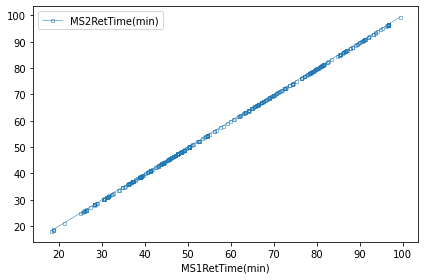

In [34]:
df.plot(x='MS1RetTime(min)',y='MS2RetTime(min)', marker='s')

In [24]:
import pyteomics


In [38]:
import plotly.express as px

In [239]:
import plotly.io as pio

pio.templates["draft"] = go.layout.Template(
    layout=dict(font={'size': 10}),
)

pio.templates.default = "draft"

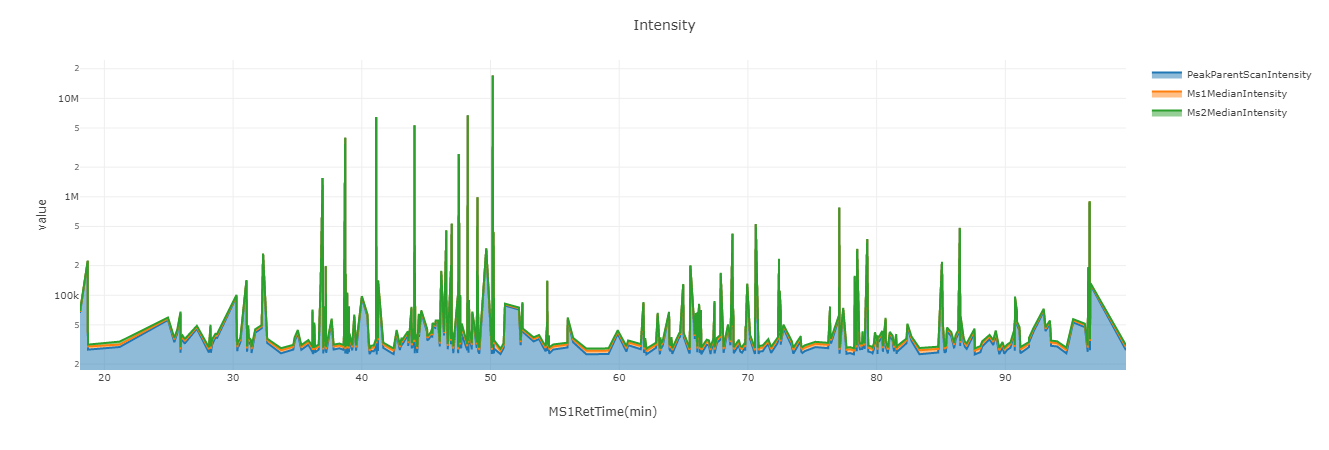

In [242]:
def fig_median_intensiity(rawtools_matrix: ):
    fig = px.area(rawtools_matrix, 
                  x='MS1RetTime(min)',
                  y=['PeakParentScanIntensity', 
                     'Ms1MedianIntensity', 
                     'Ms2MedianIntensity'],
                  )
    fig.update_layout(title='Intensity')
    fig.update_layout(yaxis_type="log")
    fig.update_layout(legend_title_text='')
    return fig

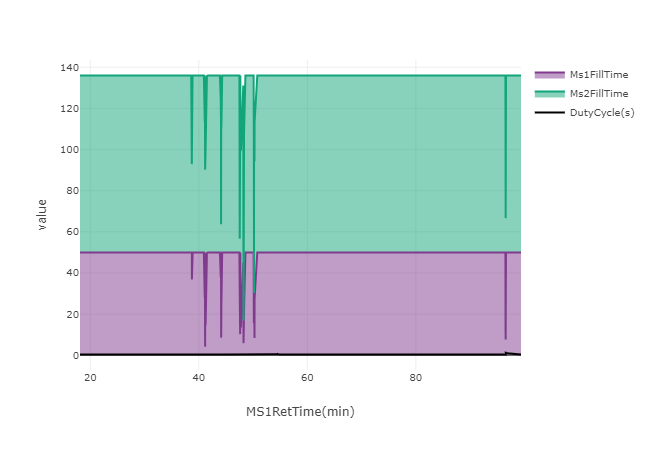

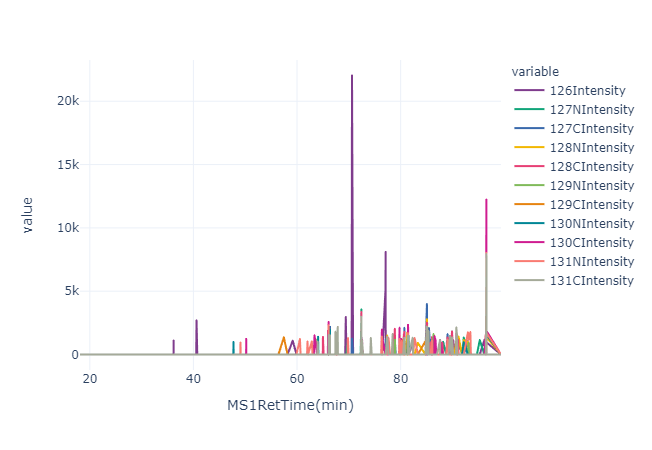

In [136]:
fig = px.line(df.set_index('MS1RetTime(min)').filter(regex='^1.*Intensity'), template=template,
              color_discrete_sequence=px.colors.qualitative.Bold)
#fig.update_layout(yaxis_type="log")
fig


In [162]:
cl.scales['12']['qual']

{'Paired': ['rgb(166,206,227)',
  'rgb(31,120,180)',
  'rgb(178,223,138)',
  'rgb(51,160,44)',
  'rgb(251,154,153)',
  'rgb(227,26,28)',
  'rgb(253,191,111)',
  'rgb(255,127,0)',
  'rgb(202,178,214)',
  'rgb(106,61,154)',
  'rgb(255,255,153)',
  'rgb(177,89,40)'],
 'Set3': ['rgb(141,211,199)',
  'rgb(255,255,179)',
  'rgb(190,186,218)',
  'rgb(251,128,114)',
  'rgb(128,177,211)',
  'rgb(253,180,98)',
  'rgb(179,222,105)',
  'rgb(252,205,229)',
  'rgb(217,217,217)',
  'rgb(188,128,189)',
  'rgb(204,235,197)',
  'rgb(255,237,111)']}

In [163]:
colors = cl.interp( cl.scales['12']['qual']['Set3'], 11)

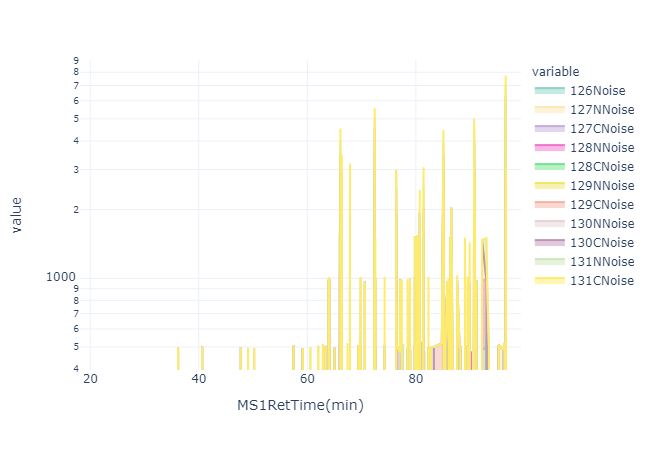

In [164]:
import colorlover as cl

fig = px.area(df.set_index('MS1RetTime(min)').filter(regex='^1[0-9]*[NC]?Noise$'), template=template,
              color_discrete_sequence=colors)
fig.update_layout(yaxis_type="log")
fig


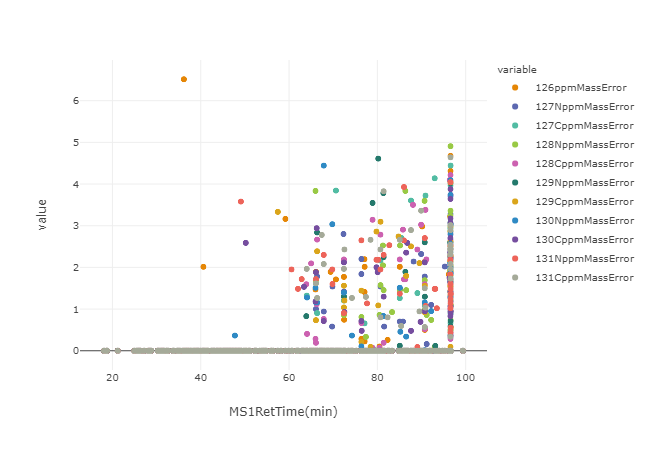

In [245]:
fig = px.scatter(df.set_index('MS1RetTime(min)').filter(regex='Error'), template=template,
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig


ParentPeakArea             float64
PeakFirstScan                int64
PeakMaxScan                  int64
PeakLastScan                 int64
BaseLinePeakWidth(s)       float64
PeakParentScanIntensity    float64
PeakMaxIntensity           float64
dtype: object

ParentPeakArea  PeakFirstScan  PeakMaxScan  PeakLastScan  \
MS1RetTime(min)                                                             
18.105550            928.048096         2605.0       2607.0        2610.0   
18.708431          12516.564203         2689.0       2692.0        2698.0   
18.708431           4639.489255         2690.0       2692.0        2698.0   
18.724377            427.740856         2694.0       2698.0        2701.0   
21.184416          14040.274482         3052.0       3055.0        3063.0   

                 BaseLinePeakWidth(s)  PeakParentScanIntensity  \
MS1RetTime(min)                                                  
18.105550                    0.028092             66072.000000   
18.708431                    0.051465            221862.265625   
18.708431                    0.044356             60011.671875   
18.724377                    0.030521             28029.080078   
21.184416                    0.069627             29790.712891   

                 PeakMaxIntensity  
MS1RetTime(min)                    
18.105550            6.607200e+04  
18.708431            1.387428e+06  
18.708431            3.680557e+05  
18.724377            2.802908e+04  
21.184416            7.044855e+05

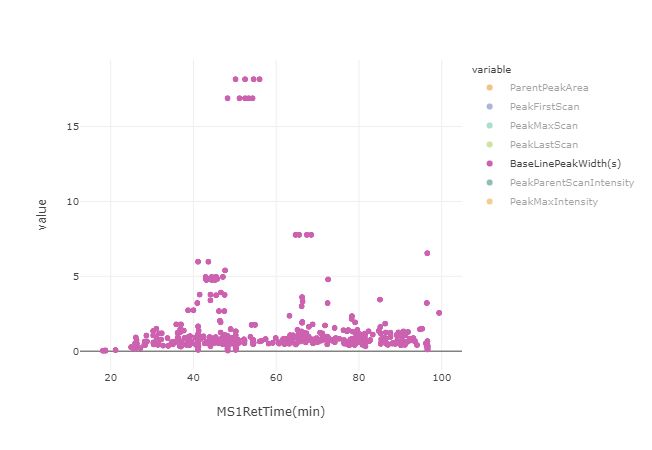

In [252]:
tmp = df.set_index('MS1RetTime(min)').filter(regex='Peak').drop('ParentPeakFound', axis=1).astype(float)
display(tmp.head())

fig = px.scatter(tmp, template=template,
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig


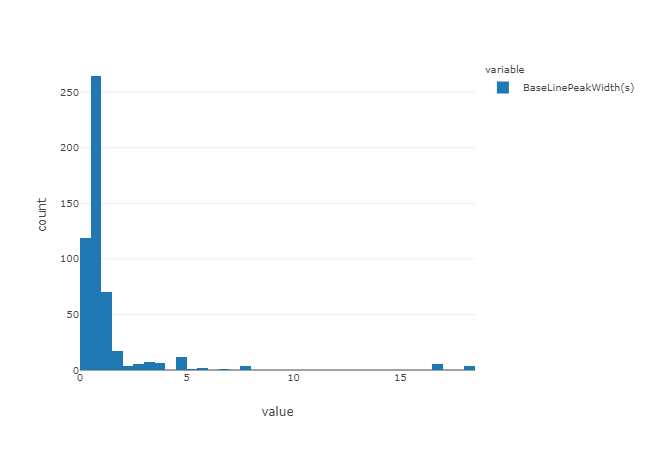

In [254]:
px.histogram(df['BaseLinePeakWidth(s)'])

In [256]:
df.histogram()

MS2ScanNumber  MS1ScanNumber  MS2RetTime(min)  MS1RetTime(min)  \
0           2609           2607        18.113687        18.105550   
1           2696           2694        18.716585        18.708431   
2           2697           2694        18.721008        18.708431   
3           2700           2698        18.732888        18.724377   
4           3056           3054        21.192547        21.184416   

   DutyCycle(s)  Ms2TriggerRate(/Ms1Scan)  ParentIonMass  MonoisotopicMass  \
0      0.415215                         1     517.737488        517.737488   
1      0.416242                         2     431.203674        431.203674   
2      0.416242                         2     425.200134        425.200134   
3      0.437595                         1     441.867035        441.867035   
4      0.414797                         1     569.749756        569.749756   

   PrecursorCharge  MS1IsolationInterference  ...  127CppmMassError  \
0                2                  0.000000  ...               0.0   
1                3                  0.023107  ...               0.0   
2                3                  0.035834  ...               0.0   
3                3                  0.000000  ...               0.0   
4                2                  0.000000  ...               0.0   

   128NppmMassError  128CppmMassError  129NppmMassError  129CppmMassError  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   130NppmMassError  130CppmMassError  131NppmMassError  131CppmMassError  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   Unnamed: 100  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 101 columns]

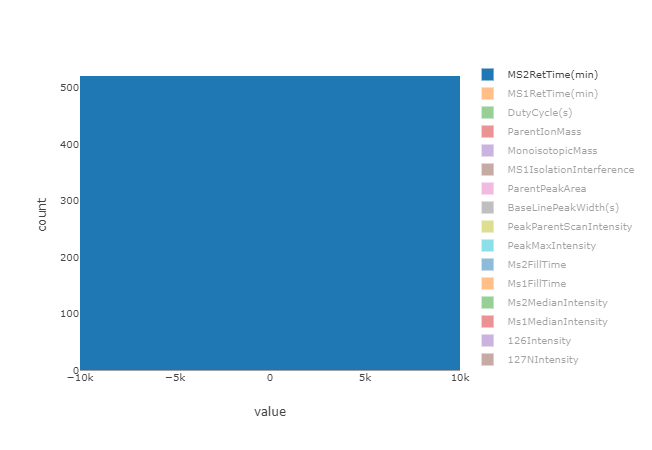

In [290]:
int_types = ['int16', 'int32', 'int64',]
float_types = ['float16', 'float32', 'float64']
numerics = ints_types + float_types

cols = df.select_dtypes(float_types).columns

fig = px.histogram(df[cols[0]].astype(float))

for col in cols[1:]:
    fig.add_trace(go.Histogram(x=df[col].astype(float), visible = 'legendonly', name=col))
   
fig.update_layout(legend_title_text='')

fig

In [288]:
df.select_dtypes(int_types)

MS2ScanNumber  MS1ScanNumber  Ms2TriggerRate(/Ms1Scan)  PrecursorCharge  \
0             2609           2607                         1                2   
1             2696           2694                         2                3   
2             2697           2694                         2                3   
3             2700           2698                         1                3   
4             3056           3054                         1                2   
..             ...            ...                       ...              ...   
517          14351          14334                         6                5   
518          14352          14334                         6                3   
519          14353          14334                         6                3   
520          14355          14347                         1                4   
521          14753          14751                         1                2   

     PeakFirstScan  PeakMaxScan  PeakLastScan  HCDEnergy  126Resolution  \
0             2605         2607          2610         38              0   
1             2689         2692          2698         38              0   
2             2690         2692          2698         38              0   
3             2694         2698          2701         38              0   
4             3052         3055          3063         38              0   
..             ...          ...           ...        ...            ...   
517          14315        14319         14361         38              0   
518          14318        14322         14362         38              0   
519          14318        14320         14364         38              0   
520          14315        14320         14388         38          44500   
521          14472        14744         14842         38              0   

     127NResolution  127CResolution  128NResolution  128CResolution  \
0                 0               0               0               0   
1                 0               0               0               0   
2                 0               0               0               0   
3                 0               0               0               0   
4                 0               0               0               0   
..              ...             ...             ...             ...   
517               0               0           44400           49700   
518               0               0           46500           45500   
519               0               0               0               0   
520               0           43900           46700               0   
521               0               0               0               0   

     129NResolution  129CResolution  130NResolution  130CResolution  \
0                 0               0               0               0   
1                 0               0               0               0   
2                 0               0               0               0   
3                 0               0               0               0   
4                 0               0               0               0   
..              ...             ...             ...             ...   
517               0               0               0               0   
518               0               0               0               0   
519               0               0               0               0   
520               0               0           45000           44100   
521               0               0               0               0   

     131NResolution  131CResolution  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  
..              ...             ...  
517               0               0  
518               0               0  
519               0               0  
520           45600               0  
521               0

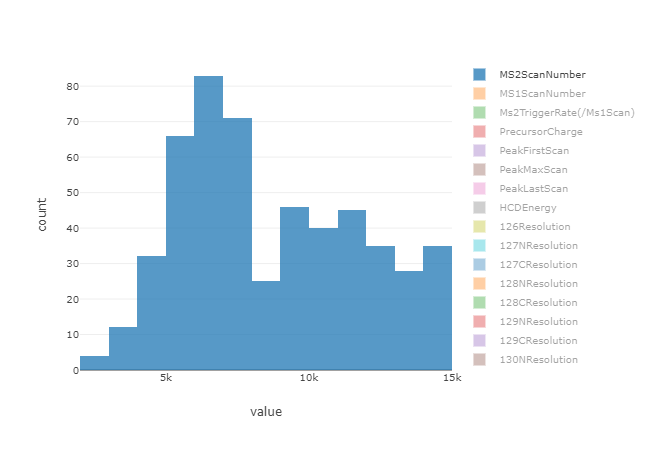

In [300]:
cols = df.select_dtypes(int_types).columns

fig = px.histogram(df[cols[0]])

for col in cols[1:]:
    fig.add_trace(go.Histogram(x=df[col], visible = 'legendonly', name=col))
   
fig.update_layout(legend_title_text='')
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)

fig

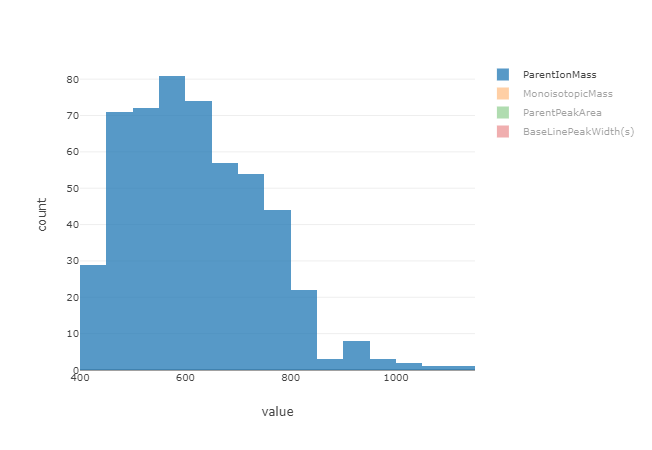

In [303]:
def histograms(rawtools_matrix):
    cols = ['ParentIonMass',
            'MonoisotopicMass',
            'ParentPeakArea',
            'BaseLinePeakWidth(s)']

    fig = px.histogram(df[cols[0]])
    for col in cols[1:]:
        fig.add_trace(
                go.Histogram(
                        x=rawtools_matrix[col], 
                        visible = 'legendonly', 
                        name=col))
    fig.update_layout(legend_title_text='')
    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.75)
    return fig

histograms(df)

In [313]:
def histograms(rawtools_matrix, cols=['ParentIonMass'], title=None):
    fig = px.histogram(df[cols[0]])
    if len(cols) == 1:
        fig.update_layout(title=cols[0])
        fig.update_layout(showlegend=False)
    for col in cols[1:]:
        fig.add_trace(
                go.Histogram(
                        x=rawtools_matrix[col], 
                        visible = 'legendonly', 
                        name=col,
                        title=title))
    fig.update_layout(legend_title_text='')
    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.75)
    return fig

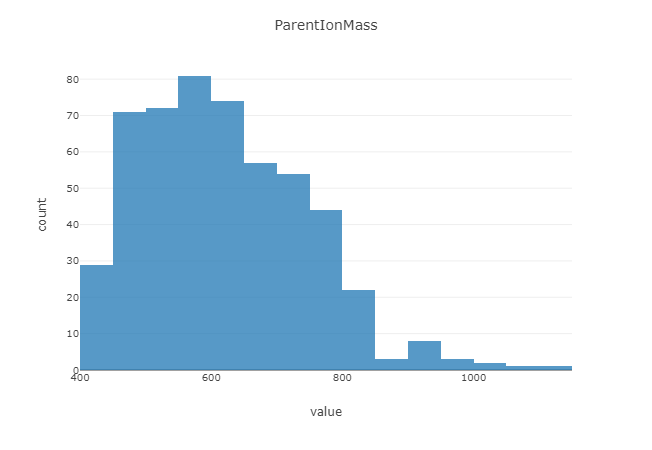

In [314]:
histograms(df)

In [328]:
from pyteomics import mgf

In [327]:
mgf.read(f'{PATH}/')

AttributeError: type object 'MGFBase' has no attribute 'read'